# **Data**

For our exercises we will use two different datasets:
- The AG News subset that features english news articles of 4 different categories
- The 10kGNAD dataset that features german news articles of 9 different categories

In [1]:
import csv
import pandas as pd

# english data
classes_en = {1: "World", 2: "Sports", 3: "Business", 4: "Sci/Tech"}
train_en = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/AGNews/train.csv", 
                       names = ["Label", "Title", "Article"],
                       encoding = "utf-8")
test_en = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/AGNews/test.csv", 
                      names = ["Label", "Title", "Article"],
                      encoding = "utf-8")

# german data
train_de = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/10kGNAD/train.csv", 
                       sep = ";", names = ["Label", "Article"], 
                       quotechar = "\'", quoting = csv.QUOTE_MINIMAL, encoding = "utf-8")
test_de = pd.read_csv("https://raw.githubusercontent.com/michabirklbauer/hgb_dse_text_mining/master/data/10kGNAD/test.csv", 
                       sep = ";", names = ["Label", "Article"], 
                       quotechar = "\'", quoting = csv.QUOTE_MINIMAL, encoding = "utf-8")

### The english dataset features 120 000 training and 7600 test samples with equally balanced classes

In [2]:
print(train_en.shape)
print(test_en.shape)
train_en.head()

(120000, 3)
(7600, 3)


Label                                              Title  \
0      3  Wall St. Bears Claw Back Into the Black (Reuters)   
1      3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2      3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3      3  Iraq Halts Oil Exports from Main Southern Pipe...   
4      3  Oil prices soar to all-time record, posing new...   

                                             Article  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...

<AxesSubplot: >

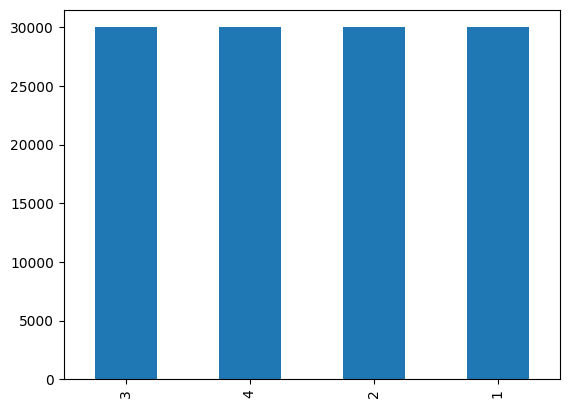

In [3]:
train_en["Label"].value_counts().plot(kind = "bar")

### The german dataset features 9245 training and 1028 test samples with rather unbalanced classes

In [4]:
print(train_de.shape)
print(test_de.shape)
train_de.head()

(9245, 2)
(1028, 2)


Label                                            Article
0       Sport  21-Jähriger fällt wohl bis Saisonende aus. Wie...
1      Kultur  Erfundene Bilder zu Filmen, die als verloren g...
2         Web  Der frischgekürte CEO Sundar Pichai setzt auf ...
3  Wirtschaft  Putin: "Einigung, dass wir Menge auf Niveau vo...
4      Inland  Estland sieht den künftigen österreichischen P...

<AxesSubplot: >

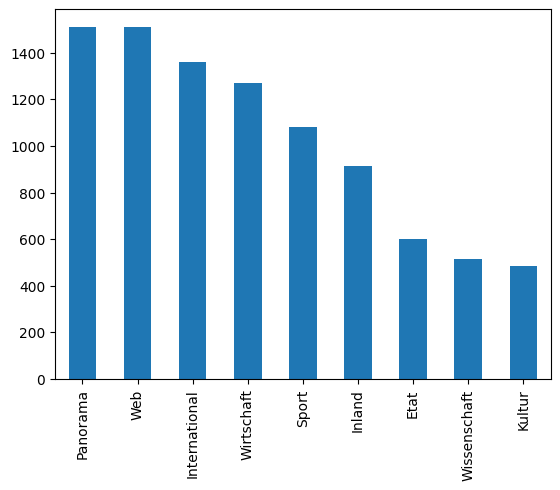

In [5]:
train_de["Label"].value_counts().plot(kind = "bar")

# **spaCy**

spaCy is a natural language processing library that comes with many built-in features that solve core linguistic tasks.  
The following exercises should be carried out by getting familiar with the spaCy API. The documentation can be found at:

[https://spacy.io/usage](https://spacy.io/usage)

spaCy needs a language model to analyze text, we will work with both the english and the german language models which can be downloaded by executing the following:

In [6]:
!python -m spacy download en_core_web_sm

     --------------------------------------- 12.8/12.8 MB 10.9 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [7]:
!python -m spacy download en_core_web_lg

     -------------------------------------- 587.7/587.7 MB 2.7 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [8]:
!python -m spacy download de_core_news_sm

     ---------------------------------------- 14.6/14.6 MB 1.6 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')


In [9]:
!python -m spacy download de_core_news_lg

     -------------------------------------- 567.8/567.8 MB 3.0 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('de_core_news_lg')


### Loading models

In [10]:
import spacy
import random
import en_core_web_lg
import de_core_news_lg

nlp_en = en_core_web_lg.load()
nlp_de = de_core_news_lg.load()

### Use spaCy to tokenize a random Article of both the english and the german dataset

In [11]:
# english
r_en = random.randint(0, train_en.shape[0] - 1)
tokens_en = nlp_en(train_en["Article"].iloc[r_en])

print(train_en["Article"].iloc[r_en])
print([token_en.text for token_en in tokens_en])

AFP - Pakistan rejected as  quot;politicking quot; a US official's weekend claim that Osama bin Laden was close to being captured.
['AFP', '-', 'Pakistan', 'rejected', 'as', ' ', 'quot;politicking', 'quot', ';', 'a', 'US', 'official', "'s", 'weekend', 'claim', 'that', 'Osama', 'bin', 'Laden', 'was', 'close', 'to', 'being', 'captured', '.']


In [12]:
# german
r_de = random.randint(0, train_de.shape[0] - 1)
tokens_de = nlp_de(train_de["Article"].iloc[r_de])

print(train_de["Article"].iloc[r_de])
print([token_de.text for token_de in tokens_de])

In den nächsten Tagen sei nicht mit neuen Verbindungen zu rechnen, heißt es vom Deutschen Zentrum für Luft- und Raumfahrt. Köln - Das Minilabor Philae wird sich in den nächsten Tagen wohl erst mal nicht wieder vom Kometen 67P/Tschurjumov-Gerasimenko  melden. Wir rechnen nicht damit, sagte Manuela Braun vom Deutschen Zentrum für Luft- und Raumfahrt (DLR) am Dienstag in Köln. Es werde zwar wieder einen Kontakt geben. Aber wann, das wissen wir jetzt nicht, so die Sprecherin. Nach den ersten Kontakten werde das DLR mit der europäischen Raumfahrtagentur ESA über eine neue Flugbahn der Muttersonde Rosetta nachdenken, um eine bessere Verbindung zu schaffen. Für die anstehenden Experimente sind stabile und längere Verbindungen zu dem Lander notwendig. Philae war im November nach zehnjähriger Reise auf dem Kometen im Schatten gelandet. Er hatte noch einige Daten gesendet und war hatte sich dann wegen Strommangels ausgeschaltet. Während Tschuri unentwegt auf die Sonne zufliegt, hat Philae inzwis

### Use spaCy to lemmatize a random Article of both the english and the german dataset

In [13]:
print(train_en["Article"].iloc[r_en])
print([token_en.lemma_ for token_en in tokens_en])

AFP - Pakistan rejected as  quot;politicking quot; a US official's weekend claim that Osama bin Laden was close to being captured.
['AFP', '-', 'Pakistan', 'reject', 'as', ' ', 'quot;politicke', 'quot', ';', 'a', 'US', 'official', "'s", 'weekend', 'claim', 'that', 'Osama', 'bin', 'Laden', 'be', 'close', 'to', 'be', 'capture', '.']


In [14]:
print(train_de["Article"].iloc[r_de])
print([token_de.lemma_ for token_de in tokens_de])

In den nächsten Tagen sei nicht mit neuen Verbindungen zu rechnen, heißt es vom Deutschen Zentrum für Luft- und Raumfahrt. Köln - Das Minilabor Philae wird sich in den nächsten Tagen wohl erst mal nicht wieder vom Kometen 67P/Tschurjumov-Gerasimenko  melden. Wir rechnen nicht damit, sagte Manuela Braun vom Deutschen Zentrum für Luft- und Raumfahrt (DLR) am Dienstag in Köln. Es werde zwar wieder einen Kontakt geben. Aber wann, das wissen wir jetzt nicht, so die Sprecherin. Nach den ersten Kontakten werde das DLR mit der europäischen Raumfahrtagentur ESA über eine neue Flugbahn der Muttersonde Rosetta nachdenken, um eine bessere Verbindung zu schaffen. Für die anstehenden Experimente sind stabile und längere Verbindungen zu dem Lander notwendig. Philae war im November nach zehnjähriger Reise auf dem Kometen im Schatten gelandet. Er hatte noch einige Daten gesendet und war hatte sich dann wegen Strommangels ausgeschaltet. Während Tschuri unentwegt auf die Sonne zufliegt, hat Philae inzwis

### Use spaCy for Part-Of-Speech tagging of a random Article of both the english and the german dataset

- Either print the token attributes or visualize them as a table!
- What do the attributes describe?
- Visualize the POS attribute as a dependency plot with spaCy's displacy!
- Optional: For the german dataset visualize sentences separately for better readability.

In [15]:
"""
    Text: The original word text.
    Lemma: The base form of the word.
    POS: The simple UPOS part-of-speech tag.
    Tag: The detailed part-of-speech tag.
    Dep: Syntactic dependency, i.e. the relation between tokens.
    Shape: The word shape – capitalization, punctuation, digits.
    is alpha: Is the token an alpha character?
    is stop: Is the token part of a stop list, i.e. the most common words of the language?
"""

token_df_en = pd.DataFrame({"Text": [token_en.text for token_en in tokens_en],
                            "Lemma": [token_en.lemma_ for token_en in tokens_en],
                            "POS": [token_en.pos_ for token_en in tokens_en],
                            "Tag": [token_en.tag_ for token_en in tokens_en],
                            "Dep": [token_en.dep_ for token_en in tokens_en],
                            "Shape": [token_en.shape_ for token_en in tokens_en],
                            "is alpha": [token_en.is_alpha for token_en in tokens_en],
                            "is stop": [token_en.is_stop for token_en in tokens_en]})

token_df_en.head()

Text     Lemma    POS   Tag       Dep  Shape  is alpha  is stop
0       AFP       AFP  PROPN   NNP  compound    XXX      True    False
1         -         -  PUNCT  HYPH     punct      -     False    False
2  Pakistan  Pakistan  PROPN   NNP     nsubj  Xxxxx      True    False
3  rejected    reject   VERB   VBD     ccomp   xxxx      True    False
4        as        as    ADP    IN      prep     xx      True     True

In [16]:
from spacy import displacy

displacy.render(tokens_en, style = "dep", jupyter = True)

In [17]:
token_df_de = pd.DataFrame({"Text": [token_de.text for token_de in tokens_de],
                            "Lemma": [token_de.lemma_ for token_de in tokens_de],
                            "POS": [token_de.pos_ for token_de in tokens_de],
                            "Tag": [token_de.tag_ for token_de in tokens_de],
                            "Dep": [token_de.dep_ for token_de in tokens_de],
                            "Shape": [token_de.shape_ for token_de in tokens_de],
                            "is alpha": [token_de.is_alpha for token_de in tokens_de],
                            "is stop": [token_de.is_stop for token_de in tokens_de]})

token_df_de.head()

Text     Lemma   POS    Tag Dep  Shape  is alpha  is stop
0        In        in   ADP   APPR  mo     Xx      True     True
1       den       der   DET    ART  nk    xxx      True     True
2  nächsten  nächster   ADJ   ADJA  nk   xxxx      True    False
3     Tagen       Tag  NOUN     NN  nk  Xxxxx      True     True
4       sei      sein   AUX  VAFIN  oc    xxx      True     True

In [18]:
displacy.render(list(tokens_de.sents)[0], style = "dep", jupyter = True)

### Use spaCy for Named Entity Recognition (NER) of a random Article of both the english and the german dataset

- Either print the entity attributes or visualize them as a table!
- Visualize the entities as an entity plot with spaCy's displacy!

In [19]:
entities_en_df = pd.DataFrame({"Text": [ent.text for ent in tokens_en.ents],
                               "Start": [ent.start_char for ent in tokens_en.ents],
                               "End": [ent.end_char for ent in tokens_en.ents],
                               "Label": [ent.label_ for ent in tokens_en.ents]})

entities_en_df.head()

Text  Start  End   Label
0         AFP - Pakistan      0   14     ORG
1  quot;politicking quot     28   49  PERSON
2                     US     53   55     GPE
3                weekend     67   74    DATE
4        Osama bin Laden     86  101  PERSON

In [20]:
displacy.render(tokens_en, style = "ent", jupyter = True)

In [21]:
entities_de_df = pd.DataFrame({"Text": [ent.text for ent in tokens_de.ents],
                               "Start": [ent.start_char for ent in tokens_de.ents],
                               "End": [ent.end_char for ent in tokens_de.ents],
                               "Label": [ent.label_ for ent in tokens_de.ents]})

entities_de_df.head()

Text  Start  End Label
0  Deutschen Zentrum für Luft- und Raumfahrt.     80  122   ORG
1                                        Köln    123  127   LOC
2                            Minilabor Philae    134  150   LOC
3                                         67P    222  225   LOC
4                     Tschurjumov-Gerasimenko    226  249   LOC

In [22]:
displacy.render(tokens_de, style = "ent", jupyter = True)

### We can also use spaCy to calculate the similarity between a german and an english article

- Read also: [https://spacy.io/usage/spacy-101#vectors-similarity](https://spacy.io/usage/spacy-101#vectors-similarity)

In [23]:
tokens_de.similarity(tokens_en)

-0.06163555180046253

In [24]:
fruits = nlp_en("apple banana")
fruits[0].similarity(fruits[1])

0.6646699905395508

### spaCy also encodes documents and tokens as feature vectors (we might come back to this later on)

In [25]:
token = tokens_en[0]
print(token.vector.shape)
print(tokens_en.vector.shape)

(300,)
(300,)
